In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")  

In [2]:


import ssl

ssl._create_default_https_context = ssl._create_unverified_context
tips = sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [5]:
tips.shape

(244, 7)

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Univariate analysis

In [9]:
def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    sns.set_style("darkgrid")
    print(f'Genrating Charts for feature : {feature}')
    #sns.set_context('poster',font_scale=1)
    #figsize(width,height)


    
    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle('Univariate analysis for '+feature)
   

    
  
    sns.histplot(data=data, x=feature, ax=axes[0], palette="winter", bins=bins, kde=kde,hue=hue, multiple="dodge")
    sns.boxplot(data=data, x=feature, ax=axes[1], showmeans=True, color="violet",hue=hue)
   



Genrating Charts for feature : total_bill


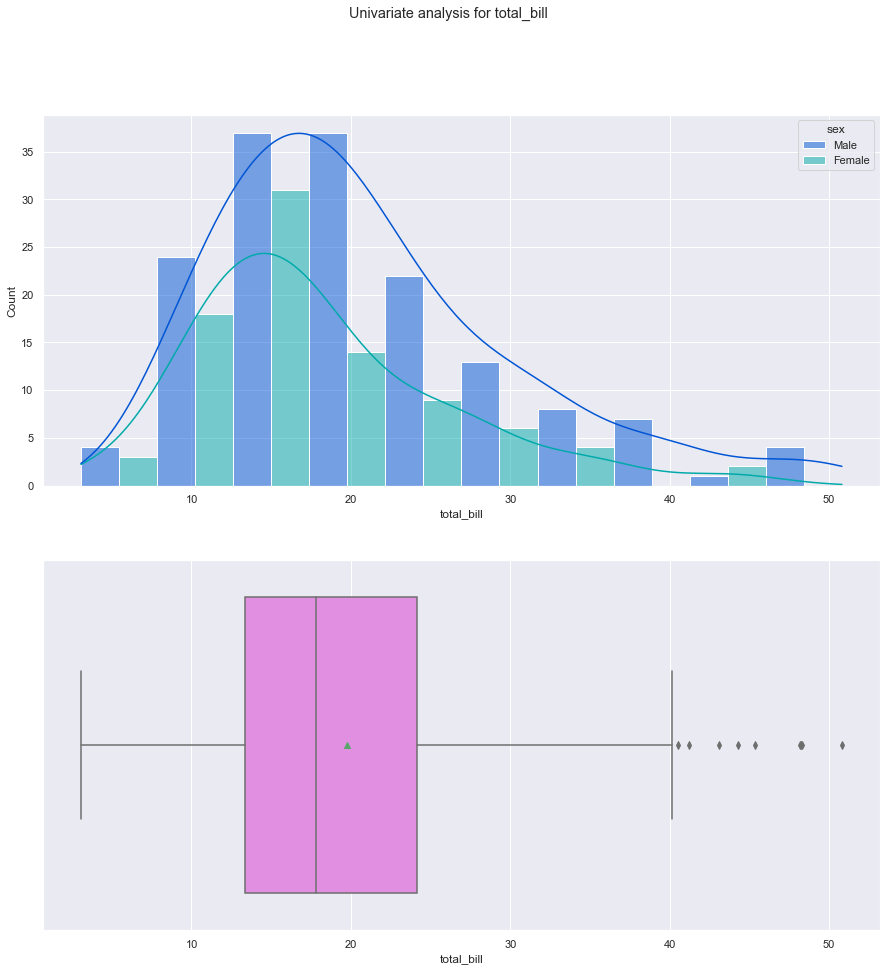

In [10]:
#with all params
generate_univariate_chart(data = tips, feature = "total_bill", hue="sex", bins=20, kde=True)  

Genrating Charts for feature : total_bill


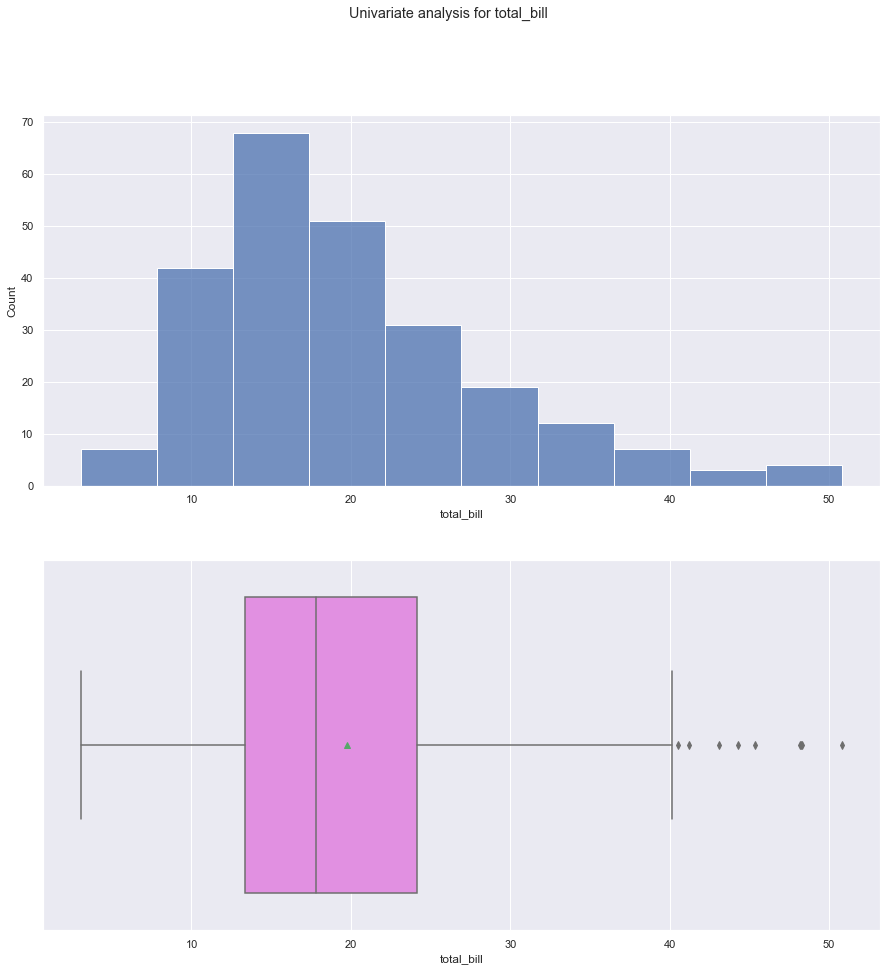

In [11]:
#with minimal param
generate_univariate_chart(data = tips, feature = "total_bill", hue=None, bins=None, kde=False) 

Genrating Charts for feature x : total_bill, y : tip


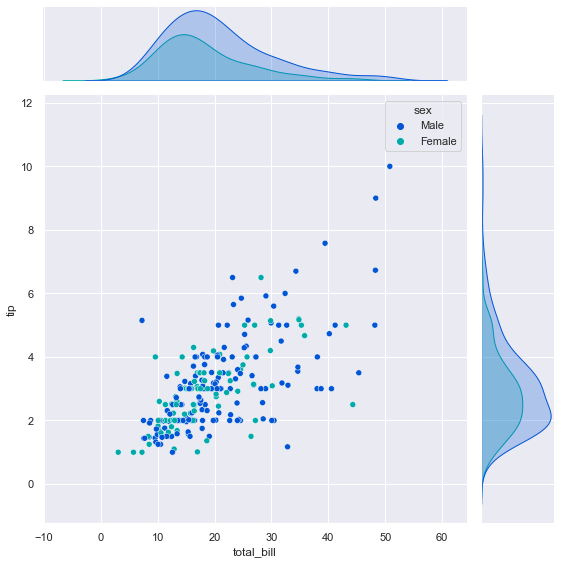

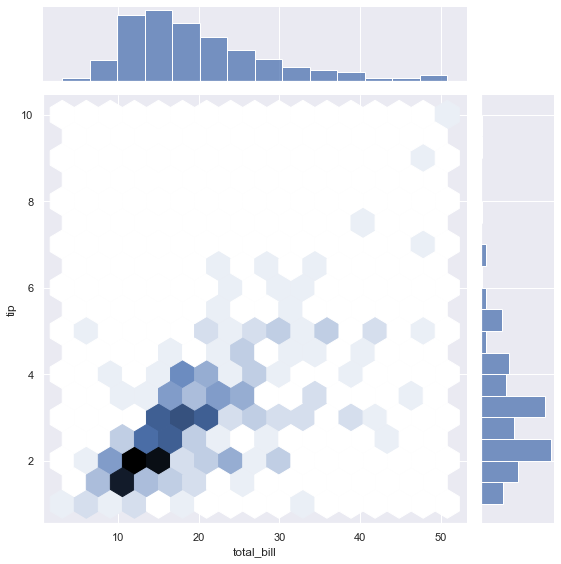

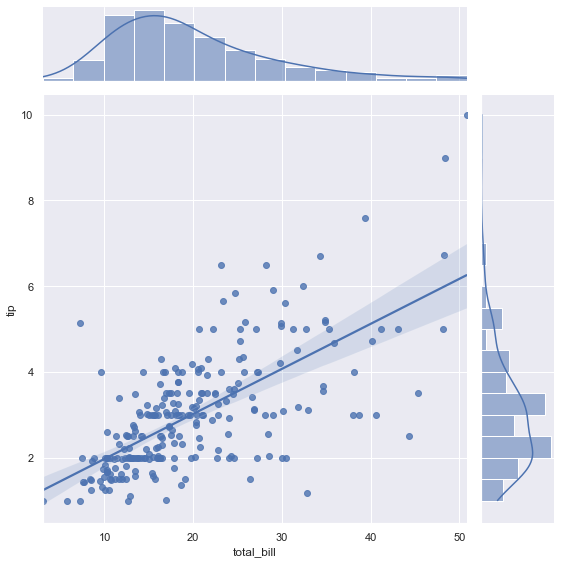

In [44]:
def generate_bivariate_chart(data, xfeature, yfeature , hue=None):
    sns.set_style("darkgrid")
    print(f'Genrating Charts for feature x : {xfeature}, y : {yfeature}')
    #sns.set_context('poster',font_scale=1)
    #figsize(width,height)


    

    sns.jointplot(data=data , x=xfeature, y=yfeature, palette="winter", height=8,kind='scatter', hue=hue);
    sns.jointplot(data=data , x=xfeature, y=yfeature, palette="winter", height=8, kind="hex");
    sns.jointplot(data=data , x=xfeature, y=yfeature, palette="winter", height=8, kind="reg");
   
generate_bivariate_chart(xfeature='total_bill',yfeature='tip',data=tips, hue="sex")

Genrating Charts for feature x : day, y : total_bill


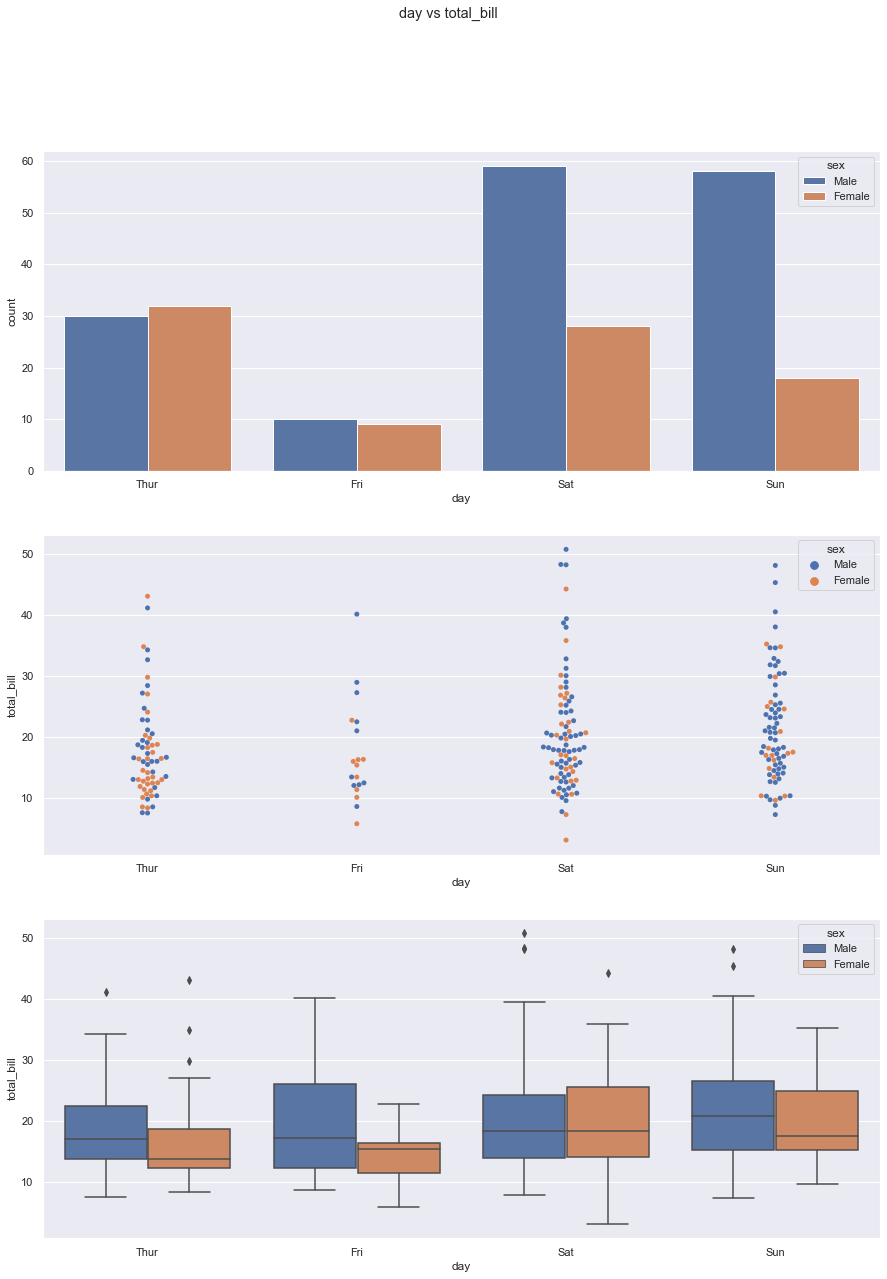

In [69]:
def generate_category_chart(data, xfeature, yfeature, hue=None):
    sns.set_style("darkgrid")
    print(f'Genrating Charts for feature x : {xfeature}, y : {yfeature}')


    #sns.jointplot(data=data , x=xfeature, y=yfeature, palette="winter", height=8,kind='scatter', hue=hue);
    fig, axes = plt.subplots(3, figsize=(15, 20))
    fig.suptitle(xfeature+' vs '+yfeature)
   
    sns.countplot(x=xfeature,data=tips, ax=axes[0], hue=hue)
    sns.swarmplot(x=xfeature, y=yfeature, data=tips, hue=hue, ax=axes[1])
    sns.boxplot(x=xfeature, y=yfeature, hue=hue,data=tips, ax=axes[2])


    
generate_category_chart(xfeature='day',yfeature='total_bill',data=tips, hue="sex")

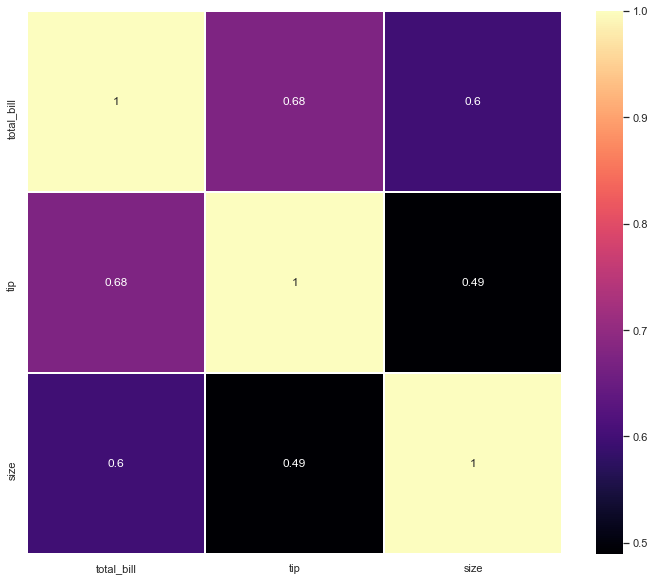

In [75]:
def generate_matrix_chart(data):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,10))
    sns.heatmap(data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

    
generate_matrix_chart(tips)

<Figure size 864x864 with 0 Axes>

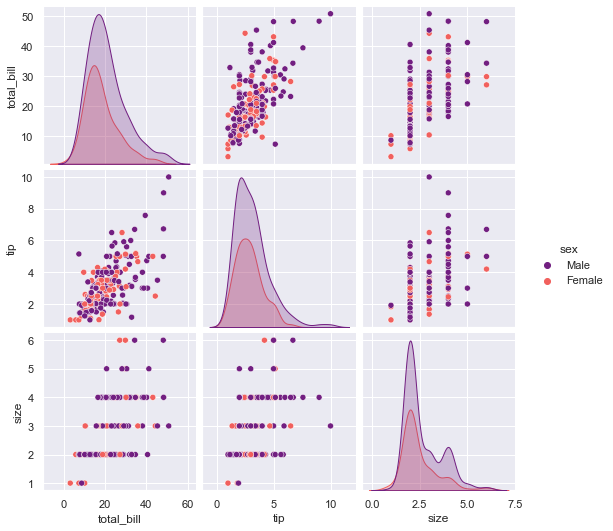

In [80]:
def generate_pairplot_chart(data, hue=None):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,12))
    sns.pairplot(data,hue=hue,palette='magma')
    
generate_pairplot_chart(tips, hue="sex")

Genrating Charts for feature x : total_bill, y : tip


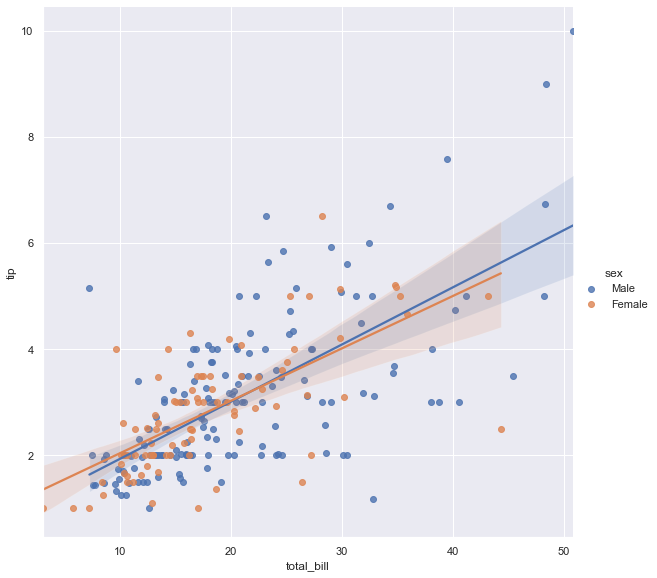

In [92]:
def generate_linear_chart(data, xfeature, yfeature, hue=None):
    sns.set_style("darkgrid")
    print(f'Genrating Charts for feature x : {xfeature}, y : {yfeature}')
    sns.lmplot(x=xfeature, y=yfeature, data=tips, hue=hue, height=8)



    
generate_linear_chart(xfeature='total_bill',yfeature='tip',data=tips, hue="sex")